In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
df=pd.read_csv('./Data/mnist_train.csv',header=None)

In [62]:
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
a1=df.loc[4,1:].values
a1.ndim

1

In [64]:
a2=np.reshape(a1,(28,28))
a2.ndim

2

9


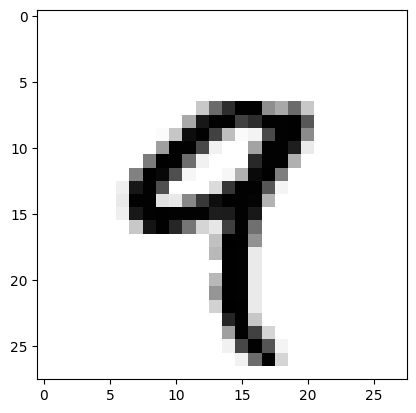

In [65]:
plt.imshow(a2,cmap="binary")
print(df.iloc[4,0])

In [66]:
from tensorflow.keras import datasets

In [67]:
(xtrain,ytrain),(xtest,ytest)=datasets.mnist.load_data()

In [68]:
xtrain.shape

(60000, 28, 28)

In [69]:
#xtrain.reshape(60000,np.prod(28*28))
xtrain=xtrain.reshape(len(xtrain),np.prod(xtrain.shape[1]*xtrain.shape[2]))
xtest=xtest.reshape(len(xtest),np.prod(xtest.shape[1]*xtest.shape[2]))

In [70]:
print("xtrain:",xtrain.shape)
print("xtest:",xtest.shape)

xtrain: (60000, 784)
xtest: (10000, 784)


In [71]:
xtrain=xtrain/255 # 0 to 1
xtest=xtest/255

In [72]:
from tensorflow.keras.utils import to_categorical

In [73]:
#A total of 10 digits are availble in the dataset from 0 to 9.
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [97]:
ytrain_encoded = to_categorical(ytrain, num_classes=10)
ytest_encoded = to_categorical(ytest, num_classes=10)

In [75]:
#an array of 10 values wil be genrated for each value.
#in this example ytrain[0] is 5 so it is represnted as '1' in 5th index and all other places it will be 0
ytrain[0] 

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [81]:
'''1. Defining the model
2. Compile - optimizer, loss, 
    LossFunctions:
        regression: MSE, RSME
        Classification:Binary-cross entropy, mutliclass-cross entropy
    Activation Function:
        Binary Classification:
            "Sigmoid" as an activation function 
        Multi-class Classification:
            "softmax" as an activation function
3. Fit
4. Evaluate'''

'1. Defining the model\n2. Compile - optimizer, loss, \n    LossFunctions:\n        regression: MSE, RSME\n        Classification:Binary-cross entropy, mutliclass-cross entropy\n    Activation Function:\n        Binary Classification:\n            \n            softmax\n3. Fit\n4. Evaluate'

In [79]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential # Two types of model building Sequential, Functional
#Mostly NLP models are sequential in nature
#Functional: For each layer we need to pass both Input and Output

In [85]:
#x*w+b
784*600+600

471000

In [86]:
#x*w+b
600*400+400

240400

In [92]:
model = Sequential()
model.add(Dense(600,input_shape=(784,),activation="relu"))
model.add(Dense(400,activation="relu"))
model.add(Dense(200,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 600)               471000    
                                                                 
 dense_11 (Dense)            (None, 400)               240400    
                                                                 
 dense_12 (Dense)            (None, 200)               80200     
                                                                 
 dense_13 (Dense)            (None, 100)               20100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 812710 (3.10 MB)
Trainable params: 812710 (3.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=["accuracy"])

In [88]:
#batch_size
60000/100

600.0

In [ ]:
#Validation: Hyper Parameter tuning
#Testing: Realtime data for evaluating

In [100]:
h1=model.fit(xtrain,ytrain_encoded,epochs=100,batch_size=100, validation_data=(xtest,ytest_encoded))

Epoch 1/100


ValueError: in user code:

    File "c:\Users\gvinaykumar\OneDrive - DXC Production\Documents\5. DS_ML\6. Machine Learning\DSML\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\gvinaykumar\OneDrive - DXC Production\Documents\5. DS_ML\6. Machine Learning\DSML\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\gvinaykumar\OneDrive - DXC Production\Documents\5. DS_ML\6. Machine Learning\DSML\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\gvinaykumar\OneDrive - DXC Production\Documents\5. DS_ML\6. Machine Learning\DSML\lib\site-packages\keras\src\engine\training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\gvinaykumar\OneDrive - DXC Production\Documents\5. DS_ML\6. Machine Learning\DSML\lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "c:\Users\gvinaykumar\OneDrive - DXC Production\Documents\5. DS_ML\6. Machine Learning\DSML\lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\gvinaykumar\OneDrive - DXC Production\Documents\5. DS_ML\6. Machine Learning\DSML\lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\gvinaykumar\OneDrive - DXC Production\Documents\5. DS_ML\6. Machine Learning\DSML\lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\gvinaykumar\OneDrive - DXC Production\Documents\5. DS_ML\6. Machine Learning\DSML\lib\site-packages\keras\src\losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\gvinaykumar\OneDrive - DXC Production\Documents\5. DS_ML\6. Machine Learning\DSML\lib\site-packages\keras\src\backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (100, 10, 2, 10) and (100, 10) are incompatible
